In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import openpathsampling as paths
import openpathsampling.storage as st
storage = st.AnalysisStorage("mistis.nc")

In [2]:
mistis = storage.networks.load(0)

In [3]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)

True <openpathsampling.ensemble.TISEnsemble object at 0x10f67c090>
True <openpathsampling.ensemble.TISEnsemble object at 0x10f68f210>
True <openpathsampling.ensemble.TISEnsemble object at 0x10f60e650>


In [4]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [5]:
scheme = storage.schemes[0]
scheme.move_summary(storage)

ms_outer_shooting ran 4.98338870432% of the cycles with acceptance 7/15 (0.466666666667)
repex ran 16.2790697674% of the cycles with acceptance 28/49 (0.571428571429)
shooting ran 47.8405315615% of the cycles with acceptance 97/144 (0.673611111111)
minus ran 2.99003322259% of the cycles with acceptance 4/9 (0.444444444444)
pathreversal ran 27.5747508306% of the cycles with acceptance 57/83 (0.686746987952)


In [6]:
for trans in mistis.transitions.values():
    trans._flux = 1.0

In [7]:
mistis.rate_matrix(storage, force=True)

,"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})"
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",NaN,0.346581,0.107676
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",0.277418,NaN,NaN


In [8]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

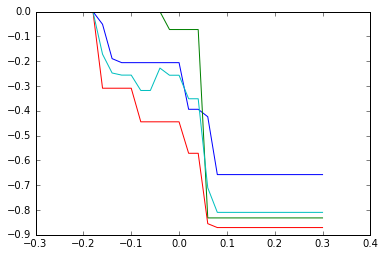

In [9]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))